# Imports 

In [1]:
import numpy as np
import ipynb.fs.full.PrepareData as data
from sklearn.model_selection import GridSearchCV
from sklearn.multioutput import MultiOutputRegressor
import itertools

strategyArray = []
errorArray    = [[], []]

/home/leandro/.local/lib/python3.6/site-packages/sklearn/utils/deprecation.py:143: FutureWarning: The sklearn.utils.testing module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.utils. Anything that cannot be imported from sklearn.utils is now part of the private API.
  warnings.warn(message, FutureWarning)
  7%|▋         | 3/43 [00:00<00:01, 24.46it/s]

[31, 27, 359, 356, 341, 367, 379, 366, 378, 374, 372, 343, 324]
2 chs: 31 entries
3 chs: 27 entries
4 chs: 359 entries
5 chs: 356 entries
6 chs: 341 entries
7 chs: 367 entries
8 chs: 379 entries
9 chs: 366 entries
10 chs: 378 entries
15 chs: 374 entries
20 chs: 372 entries
30 chs: 343 entries
40 chs: 324 entries


 79%|███████▉  | 34/43 [00:04<00:01,  5.14it/s]

StackingRegressor model failed to execute
__init__() missing 1 required positional argument: 'estimators'


 30%|███       | 13/43 [00:00<00:01, 20.51it/s]

GammaRegressor model failed to execute
Some value(s) of y are out of the valid range for family GammaDistribution


 95%|█████████▌| 41/43 [00:08<00:00,  6.37it/s]

StackingRegressor model failed to execute
__init__() missing 1 required positional argument: 'estimators'


 88%|████████▊ | 38/43 [00:05<00:00,  6.17it/s]

StackingRegressor model failed to execute
__init__() missing 1 required positional argument: 'estimators'


 26%|██▌       | 11/43 [00:00<00:01, 26.25it/s]

GammaRegressor model failed to execute
Some value(s) of y are out of the valid range for family GammaDistribution


 77%|███████▋  | 33/43 [00:04<00:02,  4.71it/s]

RANSACRegressor model failed to execute
RANSAC could not find a valid consensus set. All `max_trials` iterations were skipped because each randomly chosen sub-sample failed the passing criteria. See estimator attributes for diagnostics (n_skips*).


 95%|█████████▌| 41/43 [00:04<00:00,  7.62it/s]

StackingRegressor model failed to execute
__init__() missing 1 required positional argument: 'estimators'


 74%|███████▍  | 32/43 [00:04<00:01,  7.54it/s]

RANSACRegressor model failed to execute
RANSAC could not find a valid consensus set. All `max_trials` iterations were skipped because each randomly chosen sub-sample failed the passing criteria. See estimator attributes for diagnostics (n_skips*).


 88%|████████▊ | 38/43 [00:05<00:00,  6.73it/s]

StackingRegressor model failed to execute
__init__() missing 1 required positional argument: 'estimators'


 30%|███       | 13/43 [00:00<00:01, 15.99it/s]

GammaRegressor model failed to execute
Some value(s) of y are out of the valid range for family GammaDistribution


 95%|█████████▌| 41/43 [00:05<00:00,  7.94it/s]

StackingRegressor model failed to execute
__init__() missing 1 required positional argument: 'estimators'


 93%|█████████▎| 40/43 [00:04<00:00,  4.85it/s]

StackingRegressor model failed to execute
__init__() missing 1 required positional argument: 'estimators'


 23%|██▎       | 10/43 [00:00<00:02, 13.66it/s]

GammaRegressor model failed to execute
Some value(s) of y are out of the valid range for family GammaDistribution


 93%|█████████▎| 40/43 [00:05<00:00,  7.89it/s]

StackingRegressor model failed to execute
__init__() missing 1 required positional argument: 'estimators'


100%|██████████| 43/43 [00:08<00:00,  4.96it/s]


# Sorting the dataset

In [2]:
sortedDict = {}
commonRegressors = data.commonRegressors

for regressor in commonRegressors:
    sortedDict[regressor] = 0
    
    for i in range(data.ampNumber):
        sortedDict[regressor] += data.finalList[i][regressor][0] + data.finalList[i][regressor][1]


sortedDict = dict(sorted(sortedDict.items(), key = lambda x : x[1]))
sortedDict = dict(itertools.islice(sortedDict.items(), 5))

print(sortedDict.keys())

dict_keys(['LassoCV', 'GradientBoostingRegressor', 'Ridge', 'ElasticNetCV', 'XGBRegressor'])


# Processing data

In [3]:
from sklearn.metrics import mean_absolute_error

def getMAE(yTrue, yPredicted):
    gainErrors = []
    lossErrors = []
    
    rangeList = list(range(len(yTrue[0])))
    
    for true, predicted in zip(yTrue, yPredicted):
        gainTrue      = [true[x] for x in rangeList[0::2]]
        gainPredicted = [predicted[x] for x in rangeList[0::2]]
        lossTrue      = [true[x] for x in rangeList[1::2]]
        lossPredicted = [predicted[x] for x in rangeList[1::2]]
        
        gainErrors.append(mean_absolute_error(gainTrue, gainPredicted))
        lossErrors.append(mean_absolute_error(lossTrue, lossPredicted))
        
    return gainErrors, lossErrors

# Plotting function

In [4]:
import matplotlib.pyplot as plt

def plotGrid(gainData, lossData):
    fig, axis = plt.subplots(2, figsize = (10, 10))
    #fig.suptitle("One regressor per link - {} amplifiers".format(data.ampNumber), fontsize = 20)
    
    axis[0].boxplot(gainData)
    axis[0].set_title("Gain test error", fontsize = 18)
    axis[0].xaxis.set_tick_params(labelsize = 14)
    axis[0].set_ylim(0, 5)
    
    axis[1].boxplot(lossData)
    axis[1].set_title("Loss test error", fontsize = 18)
    axis[1].xaxis.set_tick_params(labelsize = 14)
    axis[1].set_xticklabels(strategyArray, rotation = -45, ha = 'left')
    axis[1].set_ylim(0, 5)

    fig.text(0.08, 0.5, 'Mean Absolute error (dB)', va='center', rotation='vertical', fontsize = 18)

    plt.gcf().subplots_adjust(bottom = 0.15)
    fig.savefig("../../graphs/perLink-{}amps.eps".format(data.ampNumber), format = 'eps', dpi = 1000, bbox_inches = "tight")

# Building the models

In [5]:
X, y = data.loadDataset()
X_train, X_test, y_train, y_test = data.train_test_split(X, y, test_size = 0.3, random_state = 0)

count = 1

In [6]:
from sklearn.linear_model import LassoCV

model = MultiOutputRegressor(LassoCV())

param_grid = {
    'estimator__selection': ['cyclic', 'random'],
    'estimator__alphas': [np.logspace(-4, -0.5, 30)]
}

grid = GridSearchCV(model, param_grid=param_grid)
grid.fit(X_train, y_train)

model = grid.best_estimator_
model.fit(X_train, y_train)

result = model.predict(X_test)

strategyArray.append("{} - LassoCV".format(count))
result = getMAE(y_test, result)

errorArray[0].append(result[0])
errorArray[1].append(result[1])

count += 1
print("Gain error: {} +- {}".format(np.mean(result[0]), np.std(result[0])))
print("Loss error: {} +- {}".format(np.mean(result[1]), np.std(result[1])))

Gain error: 2.0534110731565383 +- 0.9252457442385962
Loss error: 1.112018608005657 +- 1.017151303194098


In [7]:
from sklearn.ensemble import GradientBoostingRegressor

model = MultiOutputRegressor(GradientBoostingRegressor())

param_grid = {
    'estimator__learning_rate': [.1, .5, .7, 1],
    'estimator__n_estimators': [10, 50, 100],
    'estimator__subsample': [.1, .5, .7, 1]
}

grid = GridSearchCV(model, param_grid=param_grid)
grid.fit(X_train, y_train)

model = grid.best_estimator_
model.fit(X_train, y_train)

result = model.predict(X_test)

strategyArray.append("{} - GradientBoostingRegressor".format(count))
result = getMAE(y_test, result)

errorArray[0].append(result[0])
errorArray[1].append(result[1])

count += 1
print("Gain error: {} +- {}".format(np.mean(result[0]), np.std(result[0])))
print("Loss error: {} +- {}".format(np.mean(result[1]), np.std(result[1])))

Gain error: 2.042631939664553 +- 0.951056907192939
Loss error: 1.1380975753555727 +- 1.0010794106041276


In [8]:
from sklearn.linear_model import Ridge

model = MultiOutputRegressor(Ridge())

param_grid = {
    'estimator__solver': ['auto', 'svd', 'cholesky', 'lsqr', 'sparse_cg', 'sag', 'saga'],
    'estimator__max_iter': [500, 1000, 2000]
}

grid = GridSearchCV(model, param_grid=param_grid)
grid.fit(X_train, y_train)

model = grid.best_estimator_
model.fit(X_train, y_train)

result = model.predict(X_test)

strategyArray.append("{} - Ridge".format(count))
result = getMAE(y_test, result)

errorArray[0].append(result[0])
errorArray[1].append(result[1])

count += 1
print("Gain error: {} +- {}".format(np.mean(result[0]), np.std(result[0])))
print("Loss error: {} +- {}".format(np.mean(result[1]), np.std(result[1])))

Gain error: 2.0534065361181146 +- 0.9348096032623412
Loss error: 1.1622771876006446 +- 1.0103418262631307


In [9]:
from sklearn.linear_model import ElasticNetCV

model = MultiOutputRegressor(ElasticNetCV())

param_grid = {
    'estimator__selection': ['cyclic', 'random'],
    'estimator__l1_ratio': [.1, .5, .7, 1]
}

grid = GridSearchCV(model, param_grid=param_grid)
grid.fit(X_train, y_train)

model = grid.best_estimator_
model.fit(X_train, y_train)

result = model.predict(X_test)

strategyArray.append("{} - ElasticNetCV".format(count))
result = getMAE(y_test, result)

errorArray[0].append(result[0])
errorArray[1].append(result[1])

count += 1
print("Gain error: {} +- {}".format(np.mean(result[0]), np.std(result[0])))
print("Loss error: {} +- {}".format(np.mean(result[1]), np.std(result[1])))

Gain error: 2.057155045775042 +- 0.9229068726452615
Loss error: 1.1237541546209004 +- 1.0198757621141694


In [10]:
import xgboost as xgb

model = MultiOutputRegressor(xgb.XGBRegressor())
model.fit(X_train, y_train)

result = model.predict(X_test)

strategyArray.append("{} - XGBRegressor".format(count))
result = getMAE(y_test, result)

errorArray[0].append(result[0])
errorArray[1].append(result[1])

count += 1
print("Gain error: {} +- {}".format(np.mean(result[0]), np.std(result[0])))
print("Loss error: {} +- {}".format(np.mean(result[1]), np.std(result[1])))

Gain error: 2.0294942810850323 +- 0.9844363879158601
Loss error: 1.1046105045822496 +- 1.0291728627066878


In [11]:
from sklearn.dummy import DummyRegressor

model = MultiOutputRegressor(DummyRegressor())

model.fit(X_train, y_train)

result = model.predict(X_test)

strategyArray.append("{} - DummyRegressor".format(count))
result = getMAE(y_test, result)

errorArray[0].append(result[0])
errorArray[1].append(result[1])

count += 1
print("Gain error: {} +- {}".format(np.mean(result[0]), np.std(result[0])))
print("Loss error: {} +- {}".format(np.mean(result[1]), np.std(result[1])))

Gain error: 2.4881497882171733 +- 0.6934096954213148
Loss error: 2.286176357335387 +- 1.0980386273805225


dict_keys(['LassoCV', 'GradientBoostingRegressor', 'Ridge', 'ElasticNetCV', 'XGBRegressor'])


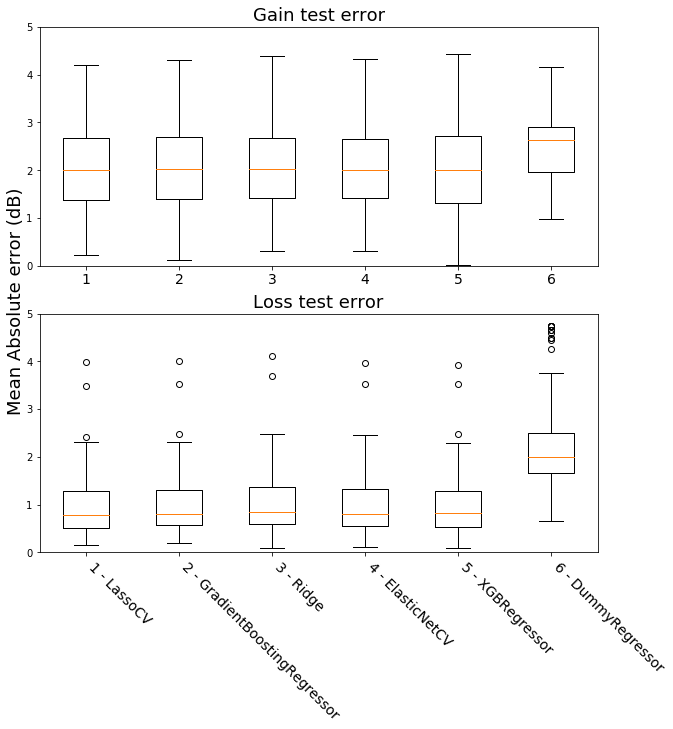

In [12]:
print(sortedDict.keys())
plotGrid(errorArray[0],errorArray[1])